<h1 style="text-align: center;">ETL y EDA con Python</h1>
<h1 style="text-align: center;">Portfolio Marco Riquelme</h1>
<h3 style="text-align: center;">DEMANDA Y GENERACIÓN DE ENERGÍA ELECTRICA EN TWH DE SUDAMERICA</h3>

# ETL - adecuación de la estructura de la tabla

## Importamos la librería de trabajo

In [1]:
## Instalación de la librería sqlalchemy pyodbc  quitar el signo # para instalar la libreria
#!pip install sqlalchemy pyodbc
#!pip install --upgrade openpyxl
!pip install --upgrade openpyxl==3.1.0

In [2]:
#!pip install --upgrade openpyxl
!pip show openpyxl

Name: openpyxl
Version: 3.1.0
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Anaconda3\Lib\site-packages
Requires: et-xmlfile
Required-by: 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy   as np
import pyodbc  as db

## Conectamos y mostramos el DataFrame

In [4]:
ruta_csv = 'c:/Analista de datos/Portafolio/Global Electricity Demand and Generation.csv'
df_csv = pd.read_csv (ruta_csv, sep=';', encoding='UTF-8')
df_csv.head()

#ruta_excel = 'c:/Analista de datos/Portafolio/Respaldo XLS/Global Electricity Demand and Generation.xlsx'
#Hoja = 'Global'
#df_excel = pd.read_excel(ruta_excel, sheet_name=Hoja)
#df_excel.head ()


,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,Venezuela,VEN,2010,11078,11078
1,Venezuela,VEN,2015,11823,1192
2,Venezuela,VEN,2020,9359,9424
3,Uruguay,URY,2010,1072,1104
4,Uruguay,URY,2015,1229,1361


## Empezamos con el proceso ETL

In [5]:
# Creamos listas para cada columna de nuestro DataFrame
País= []
Año = []
Electricidad_Demandada_TWH  = []
Electricidad_Generada_TWH = []


In [6]:
#Creamos una lista de columnas para utilizarlas en nuestro bucle
df_csv.columns

Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh',
       'Electricity generation - TWh'],
      dtype='object')

In [7]:
# Rellenamos las listas con los datos del DataFrame importado
for index, row in df_csv.iterrows():
    País.append(row['Entity'])
    Año.append(row['Year'])
    Electricidad_Demandada_TWH .append(row['Electricity demand - TWh'])    
    Electricidad_Generada_TWH.append(row['Electricity generation - TWh'])    
    

In [8]:
# Creación del Dataframe nuevo para ajustar nuestra estructura tabular
df_t = pd.DataFrame({
    'País': País,
    'Año': Año,
    'Electricidad_Demandada_TWH': Electricidad_Demandada_TWH,
    'Electricidad_Generada_TWH': Electricidad_Generada_TWH,
    
})
# Mostramos el DataFrame
df_t.tail(10)

,País,Año,Electricidad_Demandada_TWH,Electricidad_Generada_TWH
26,Brazil,2020,63908,61436
27,Brazil,2015,60599,57157
28,Bolivia,2010,644,644
29,Bolivia,2015,862,862
30,Bolivia,2020,977,977
31,Bolivia,2022,1127,1127
32,Argentina,2010,12823,11963
33,Argentina,2015,14675,13779
34,Argentina,2020,14341,1387
35,Argentina,2022,15549,14368


In [23]:
# eliminamos filas que tengan NaN en toda la fila
df_t = df_t.dropna(how='all')

#rellenamos hacia abajo en el campo anio
df_t['Año'] = df_t['Año'].ffill()

#Mostramos el DataFrame

#df_t
df_t.head()

,País,Año,Electricidad_Demandada_TWH,Electricidad_Generada_TWH
0,Venezuela,2010,11078,11078
1,Venezuela,2015,11823,1192
2,Venezuela,2020,9359,9424
3,Uruguay,2010,1072,1104
4,Uruguay,2015,1229,1361


In [10]:
# Se exporta a un excel, con el código anterior se puede armar un scritp para automatizar la transformación
# df_final.to_excel("datos_inmuebles.xlsx", index=False)

# EDA Análisis exploratorio

In [24]:

# Verificar la conversión
df_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   País                        36 non-null     object
 1   Año                         36 non-null     int64 
 2   Electricidad_Demandada_TWH  36 non-null     int64 
 3   Electricidad_Generada_TWH   36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [25]:
df_t.describe()

,Año,Electricidad_Demandada_TWH,Electricidad_Generada_TWH
count,36.000000,36.000000,36.000000
mean,2016.166667,11878.055556,11254.305556
std,4.613644,18762.643778,17810.027641
min,2010.000000,185.000000,465.000000
25%,2010.000000,1203.500000,1380.500000
50%,2015.000000,5976.500000,5598.000000
75%,2020.000000,11264.250000,8695.000000
max,2022.000000,70399.000000,68089.000000


In [26]:
df_t.shape

(36, 4)

In [14]:
df_t.select_dtypes('object')

,País
0,Venezuela
1,Venezuela
2,Venezuela
3,Uruguay
4,Uruguay
5,Uruguay
6,Peru
7,Peru
8,Peru
9,Peru


In [27]:
df_t.select_dtypes('int64')

,Año,Electricidad_Demandada_TWH,Electricidad_Generada_TWH
0,2010,11078,11078
1,2015,11823,1192
2,2020,9359,9424
3,2010,1072,1104
4,2015,1229,1361
5,2020,1291,1354
6,2010,3417,3428
7,2015,462,4625
8,2020,5286,5282
9,2022,6031,6027


In [28]:
#muestra una suma de los campos que tienene nulo
df_t.isna().sum()

País                          0
Año                           0
Electricidad_Demandada_TWH    0
Electricidad_Generada_TWH     0
dtype: int64

In [29]:
#imprime las paises unicos de la tabla
print (df_t['País'].unique())

['Venezuela' 'Uruguay' 'Peru' 'Paraguay' 'Ecuador' 'Colombia' 'Chile'
 'Brazil' 'Bolivia' 'Argentina']


In [30]:
#Conteo de valores únicos
df_t['País'].value_counts()

País
Peru         4
Colombia     4
Chile        4
Brazil       4
Bolivia      4
Argentina    4
Venezuela    3
Uruguay      3
Paraguay     3
Ecuador      3
Name: count, dtype: int64

In [31]:
# Muestra el porcentaje de países respecto al total
df_t['País'].value_counts('%') * 100

País
Peru         11.111111
Colombia     11.111111
Chile        11.111111
Brazil       11.111111
Bolivia      11.111111
Argentina    11.111111
Venezuela     8.333333
Uruguay       8.333333
Paraguay      8.333333
Ecuador       8.333333
Name: proportion, dtype: float64

In [20]:
suma_uf_por_foja = df_t.groupby('País')['Año'].sum().sort_values(ascending=False)
#print(suma_uf_por_comuna)
df_t.head(108)

,País,Año,Electricidad_Demandada_TWH,Electricidad_Generada_TWH
0,Venezuela,2010,11078,11078
1,Venezuela,2015,11823,1192
2,Venezuela,2020,9359,9424
3,Uruguay,2010,1072,1104
4,Uruguay,2015,1229,1361
5,Uruguay,2020,1291,1354
6,Peru,2010,3417,3428
7,Peru,2015,462,4625
8,Peru,2020,5286,5282
9,Peru,2022,6031,6027


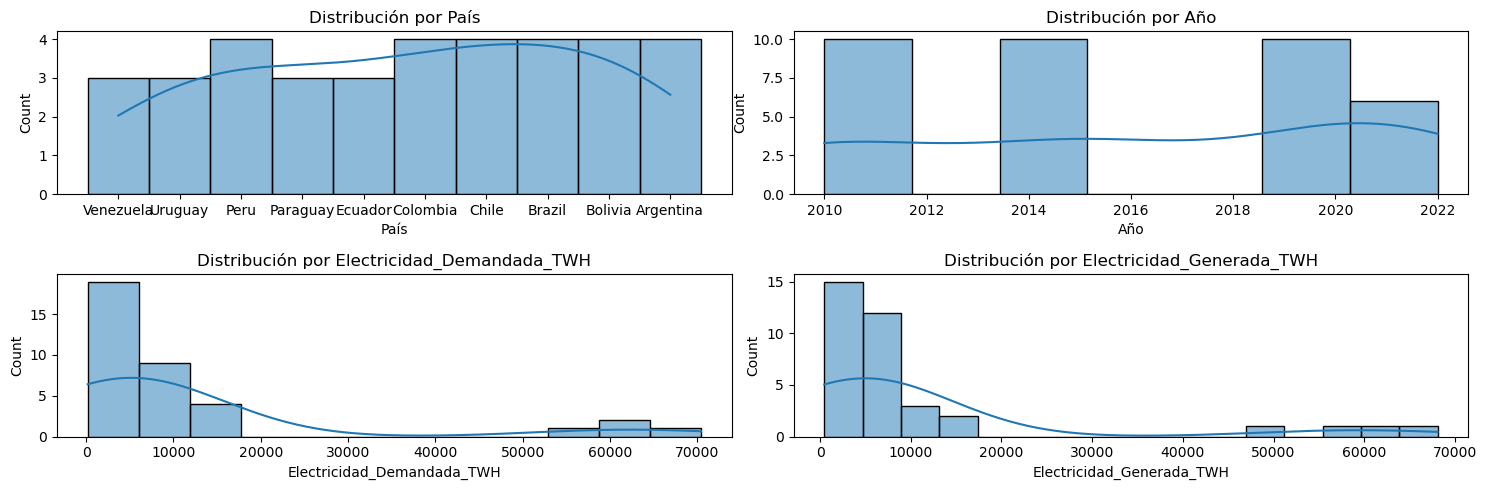

In [35]:
#df_t = df_t.replace ([np.inf -np.inf] , np.nan)
import warnings
warnings.filterwarnings("ignore")
plt.figure (figsize=(15,5))
listado = ['País',	'Año',	'Electricidad_Demandada_TWH',	'Electricidad_Generada_TWH']
for i, col in enumerate(listado):
    plt.subplot(2, 2 , i + 1)
    data_sin_nan = df_t[col].dropna()
    sns.histplot(data_sin_nan, kde=True)
    plt.title(f'Distribución por {col}')

    # eliminar valores NaN antes de hacer el histograma
    #data_sin_nan = df[col].dropna()
    #sns.histplot(data_sin_nan, kde=True)
    #plt.title(f'Distribución de {col}')
    
plt.tight_layout()
plt.show()   

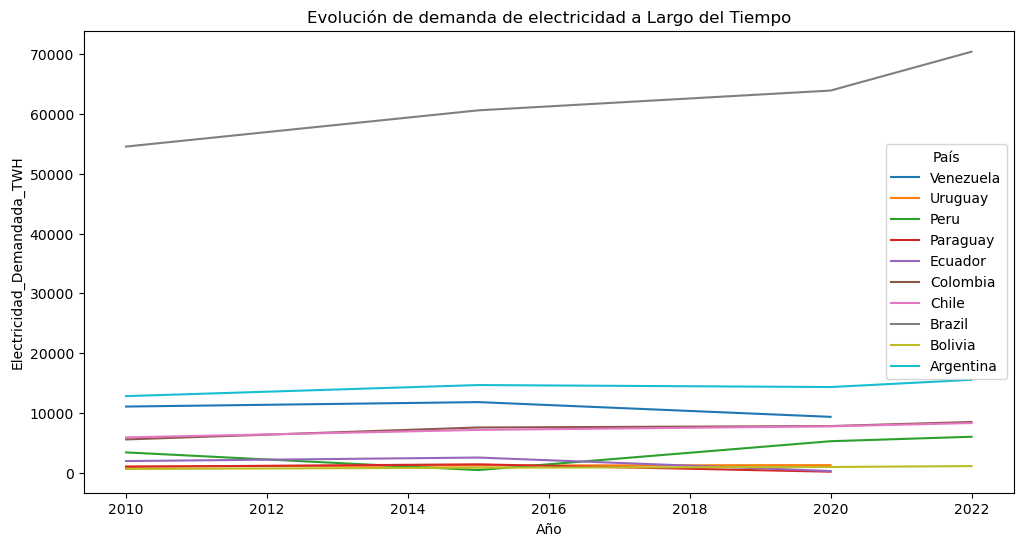

In [36]:
# Evolución de las Ventas a lo Largo del Tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Electricidad_Demandada_TWH', hue='País', data=df_t)
plt.title('Evolución de demanda de electricidad a Largo del Tiempo')
plt.show()

# Conclusion

Se observa un aumento de la demanda de energía con el correr de los años, asi, como también en la generación de ella




Resumen del EDA

1. Existen en la tabla un total de 108 filas de países con sus consumos de demanda y generación de Energía en una muestra de año con 4 columnas de las cuales 6 países aparecen 12 veces y el resto de los 4 países aparecen en 9 oportunidades. Se puede visualizar que la muestra de datos no tiene nulos, por lo que la información se encuentra correctamente limpia.
2. Otro dato es que el porcentaje de países respecto al total es el siguiente.
   
 País
Peru         11.111111
Colombia     11.111111
Chile        11.111111
Brazil       11.111111
Bolivia      11.111111
Argentina    11.111111
Venezuela     8.333333
Uruguay       8.333333
Paraguay      8.333333
Ecuador   3 



3.


  8.333333